In [1]:
import torch 
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def loadCustomModel(path, force_reload=True, conf=0.25, iou=0.45, agnostic=False, multi_label=False, classes=None, max_det=1000, amp=False, device=0):

	model = torch.hub.load('ultralytics/yolov5', 'custom', path=path, force_reload=force_reload, device=device)

	model.conf = conf
	model.iou = iou
	model.agnostic = agnostic
	model.multi_label = multi_label
	model.classes = classes
	model.max_det = max_det
	model.amp = amp

	return model

In [3]:
model = loadCustomModel(path='yolov5/runs/train/exp3/weights/best.pt', conf=0.7, iou=0.7)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Admin/.cache\torch\hub\master.zip
YOLOv5  2022-4-13 torch 1.11.0 CUDA:0 (NVIDIA GeForce GTX 1050, 3072MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1760518 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


image 1/1: 168x300 1 fire
Speed: 369.0ms pre-process, 34.9ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


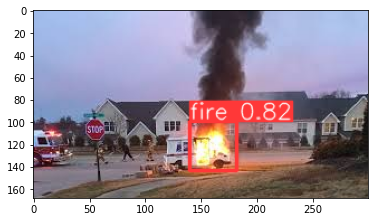

In [6]:
img = 'img (1).jpg'
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()